In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read Data
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,66,23,94,28.1,0.167,21,0
1,1,73,50,10,0,23.0,0.248,21,0
2,2,84,0,0,0,0.0,0.304,21,0
3,1,80,55,0,0,19.1,0.258,21,0
4,2,142,82,18,64,24.7,0.761,21,0


In [3]:
# data
x=df.drop("Outcome",axis=1).values

In [4]:
# outcome data
y=df['Outcome'].values

In [5]:
#แบ่งชุดข้อมูล #test_size คือส่วนของข้อมูลที่เอามา test เป็น %
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.082) 

In [6]:
print(len(x_train), len(x_test))

705 63


In [7]:
df.head(63)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,66,23,94,28.1,0.167,21,0
1,1,73,50,10,0,23.0,0.248,21,0
2,2,84,0,0,0,0.0,0.304,21,0
3,1,80,55,0,0,19.1,0.258,21,0
4,2,142,82,18,64,24.7,0.761,21,0
...,...,...,...,...,...,...,...,...,...
58,1,99,58,10,0,25.4,0.551,21,0
59,0,134,58,20,291,26.4,0.352,21,0
60,1,114,66,36,200,38.1,0.289,21,0
61,0,126,86,27,120,27.4,0.515,21,0


In [8]:
#เราจะสร้าง model โดยใช้ KNN โดยเราต้องระบุหาค่า K หรือจำหน่วยจุดใกล้เคียง 
#เพื่อคำนวนหาความแม่นยำของตัว model ว่าเราควรจะเลือกใช้ตัว K ที่สามารถบอกความแม่นยำของ model

# find k to model
k_neighbors=np.arange(1,9)

In [9]:
#empty
train_score = np.empty(len(k_neighbors))
test_score = np.empty(len(k_neighbors))

In [10]:
#ซึ่งวิธีหาคือทำการ train ค่าข้อมูลของเราไปที่ model โดยเราจะทดสอบค่า k ทุกค่า
for i,k in enumerate(k_neighbors):
    #1-8
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    #วัดประสิทธิภาพ
    train_score[i]=knn.score(x_train,y_train)
    test_score[i]=knn.score(x_test,y_test)
    print(test_score[i]*100)

76.19047619047619
76.19047619047619
80.95238095238095
80.95238095238095
82.53968253968253
84.12698412698413
84.12698412698413
80.95238095238095


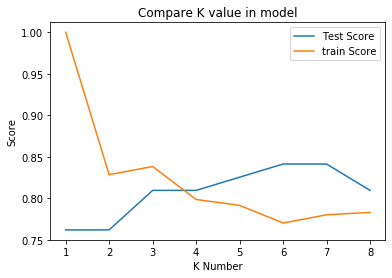

In [11]:
plt.title("Compare K value in model")
plt.plot(k_neighbors,test_score,label="Test Score")
plt.plot(k_neighbors,train_score,label="train Score")
plt.legend()
plt.xlabel("K Number")
plt.ylabel("Score")
plt.show()

In [15]:
#prediction 
knn=KNeighborsClassifier(n_neighbors=7)
#train
knn.fit(x_train,y_train)

y_pred=knn.predict(x_test)


In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        46
           1       0.68      0.76      0.72        17

    accuracy                           0.84        63
   macro avg       0.80      0.82      0.81        63
weighted avg       0.85      0.84      0.84        63



In [17]:
#ค่าความคาดเคลื่อน
print(pd.crosstab(y_test,y_pred,rownames=['Actually'],colnames=['Prediction'],margins=True))

Prediction   0   1  All
Actually               
0           40   6   46
1            4  13   17
All         44  19   63
